### Polynomial regression


In [92]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

In [96]:
x = np.arange(20, dtype=np.longdouble)
y = np.cos(x / 2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
print(X)

[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [2.00e+00 4.00e+00 8.00e+00 1.60e+01 3.20e+01 6.40e+01 1.28e+02 2.56e+02
  5.12e+02 1.02e+03 2.05e+03 4.10e+03 8.19e+03]
 [3.00e+00 9.00e+00 2.70e+01 8.10e+01 2.43e+02 7.29e+02 2.19e+03 6.56e+03
  1.97e+04 5.90e+04 1.77e+05 5.31e+05 1.59e+06]
 [4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03 4.10e+03 1.64e+04 6.55e+04
  2.62e+05 1.05e+06 4.19e+06 1.68e+07 6.71e+07]
 [5.00e+00 2.50e+01 1.25e+02 6.25e+02 3.12e+03 1.56e+04 7.81e+04 3.91e+05
  1.95e+06 9.77e+06 4.88e+07 2.44e+08 1.22e+09]
 [6.00e+00 3.60e+01 2.16e+02 1.30e+03 7.78e+03 4.67e+04 2.80e+05 1.68e+06
  1.01e+07 6.05e+07 3.63e+08 2.18e+09 1.31e+10]
 [7.00e+00 4.90e+01 3.43e+02 2.40e+03 1.68e+04 1.18e+05 8.24e+05 5.76e+06
  4.04e+07 2.82e+08 1.98e+09 1.38e+10 9.69e+10]
 [8.00e+00 6.40e+01 5.12

[ 0.03  0.03  0.03  0.03  0.03  0.03  0.03  0.03  0.02  0.01 -0.28 -3.33
  0.08] -0.22879089218401005
[ 1.    0.88  0.54  0.07 -0.42 -0.8  -0.99 -0.94 -0.65 -0.21  0.28  0.71
  0.96  0.98  0.75  0.35 -0.15 -0.6  -0.91 -1.  ]
[ 0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13
  0.13  0.12  0.09  0.04 -0.06 -0.25 -0.6  -1.21]
83.91960352654061


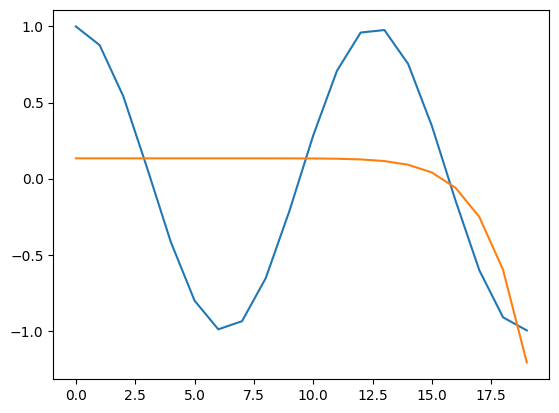

In [ ]:
def normalize_z_score(X):
    mean = X.mean()
    std = X.std()

    return (X - mean) / std, mean, std


def calc_cost(x_train, y_train, w, b) -> float:
    m: int = len(x_train)
    cost: float = 0

    for i in range(m):
        diff: float = (w @ x_train[i]) + b - y_train[i]
        cost += diff * diff

    return cost / 2 * m


def find_gradient(x_train, y_train, w, b):
    m: int = len(x_train)
    n: int = len(x_train[0])

    diff_b: float = 0
    diff_w = np.zeros(n, dtype=np.longdouble)
    cost: float = 0

    for i in range(m):
        diff: float = (w @ x_train[i]) + b - y_train[i]

        diff_b += diff
        cost += diff * diff

        for j in range(n):
            diff_w[j] += diff * x_train[i, j]

    return diff_w / m, diff_b / m, cost / (2 * m)


def gradient_descent(x_train, y_train, iterations: int, learning_rate: float):
    m: int = len(x_train)
    n: int = len(x_train[0])

    w = np.zeros(n, dtype=np.longdouble)
    b: float = 0
    allCosts = []

    for _ in range(iterations):
        diff_w, diff_b, cost = find_gradient(x_train, y_train, w, b)
        w -= learning_rate * diff_w
        b -= learning_rate * diff_b
        allCosts.append(cost)

    return w, b, allCosts


def predict(data, w, b):
    return (data @ w) + b


def test(x_train, y_train):
    m: int = len(x_train)
    pred = np.zeros(m, dtype=np.longdouble)
    iterations: int = 100000
    learning_rate: float = 1e-1

    w, b, allCosts = gradient_descent(x_train, y_train, iterations, learning_rate)

    for i in range(m):
        pred[i] = predict(x_train[i], w, b)

    print(w, b)

    print(y_train)
    print(pred)

    cost = calc_cost(x_train, y_train, w, b)
    print(cost)
    
    plt.plot(np.arange(m), y_train)
    plt.plot(np.arange(m), pred)


X, mean, std = normalize_z_score(X)

test(X, y)